In [83]:
import pandas as pd

In [84]:
import numpy as np

In [85]:
df=pd.read_csv('F:/imarticus/imarticus machine learning---lms/OLS least square/Dataset/HousePrices.csv')

In [86]:
df

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [88]:
df.isnull().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

In [89]:
df.shape

(2073, 81)

In [90]:
numerical_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))
print(categorical_features)

Number of Numerical features:  38
Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')
Number of Categorical features:  43
Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundati

# replaced nan in categorical feature with none

In [91]:
for i in categorical_features:
    df[i].fillna('none',inplace=True)

# replaced nan in numerical feature with median

In [92]:
for i in numerical_features:
    df[i].fillna(df[i].median(axis=0), inplace=True)

In [93]:
import seaborn as sns

In [94]:
import matplotlib.pyplot as plt

# box plot to see outliers

<AxesSubplot:>

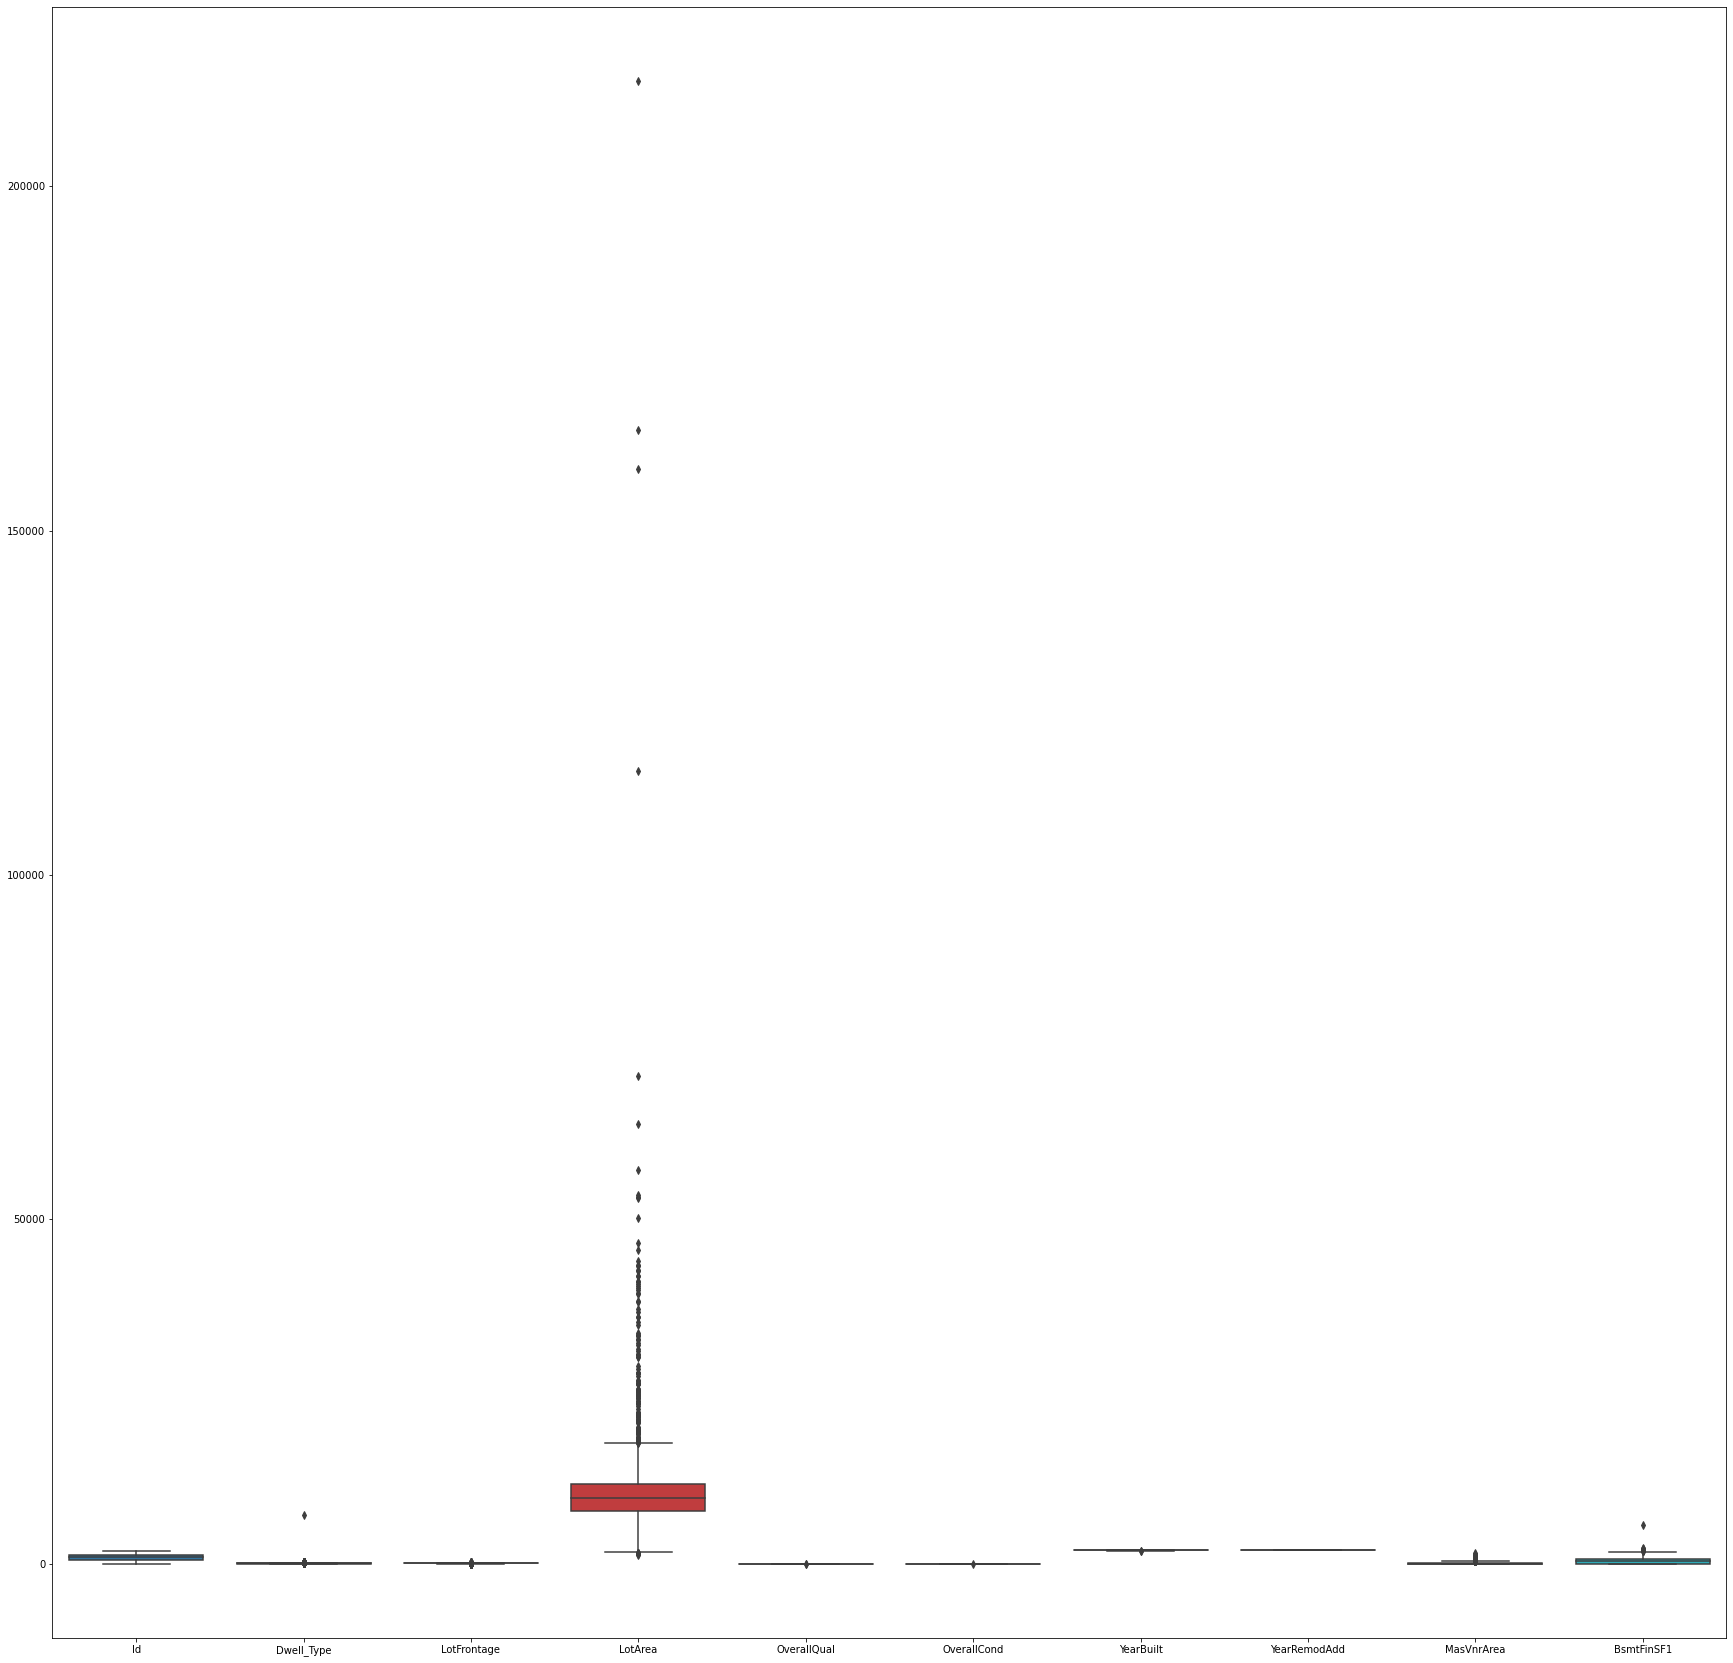

In [95]:
fig=plt.figure(figsize=(30,30))
sns.boxplot(data=df[['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1']])

# outliers removing

In [96]:
import sklearn
import pandas as pd
  
''' Detection '''
# IQR
Q1 = np.percentile(df['LotArea'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df['LotArea'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['LotArea'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['LotArea'] <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (2073, 81)
New Shape:  (1937, 81)


In [97]:
df.shape

(1937, 81)

# dataframe reset

In [98]:
df.reset_index(drop=True,inplace=True)

# boxplot to see outliers

<AxesSubplot:>

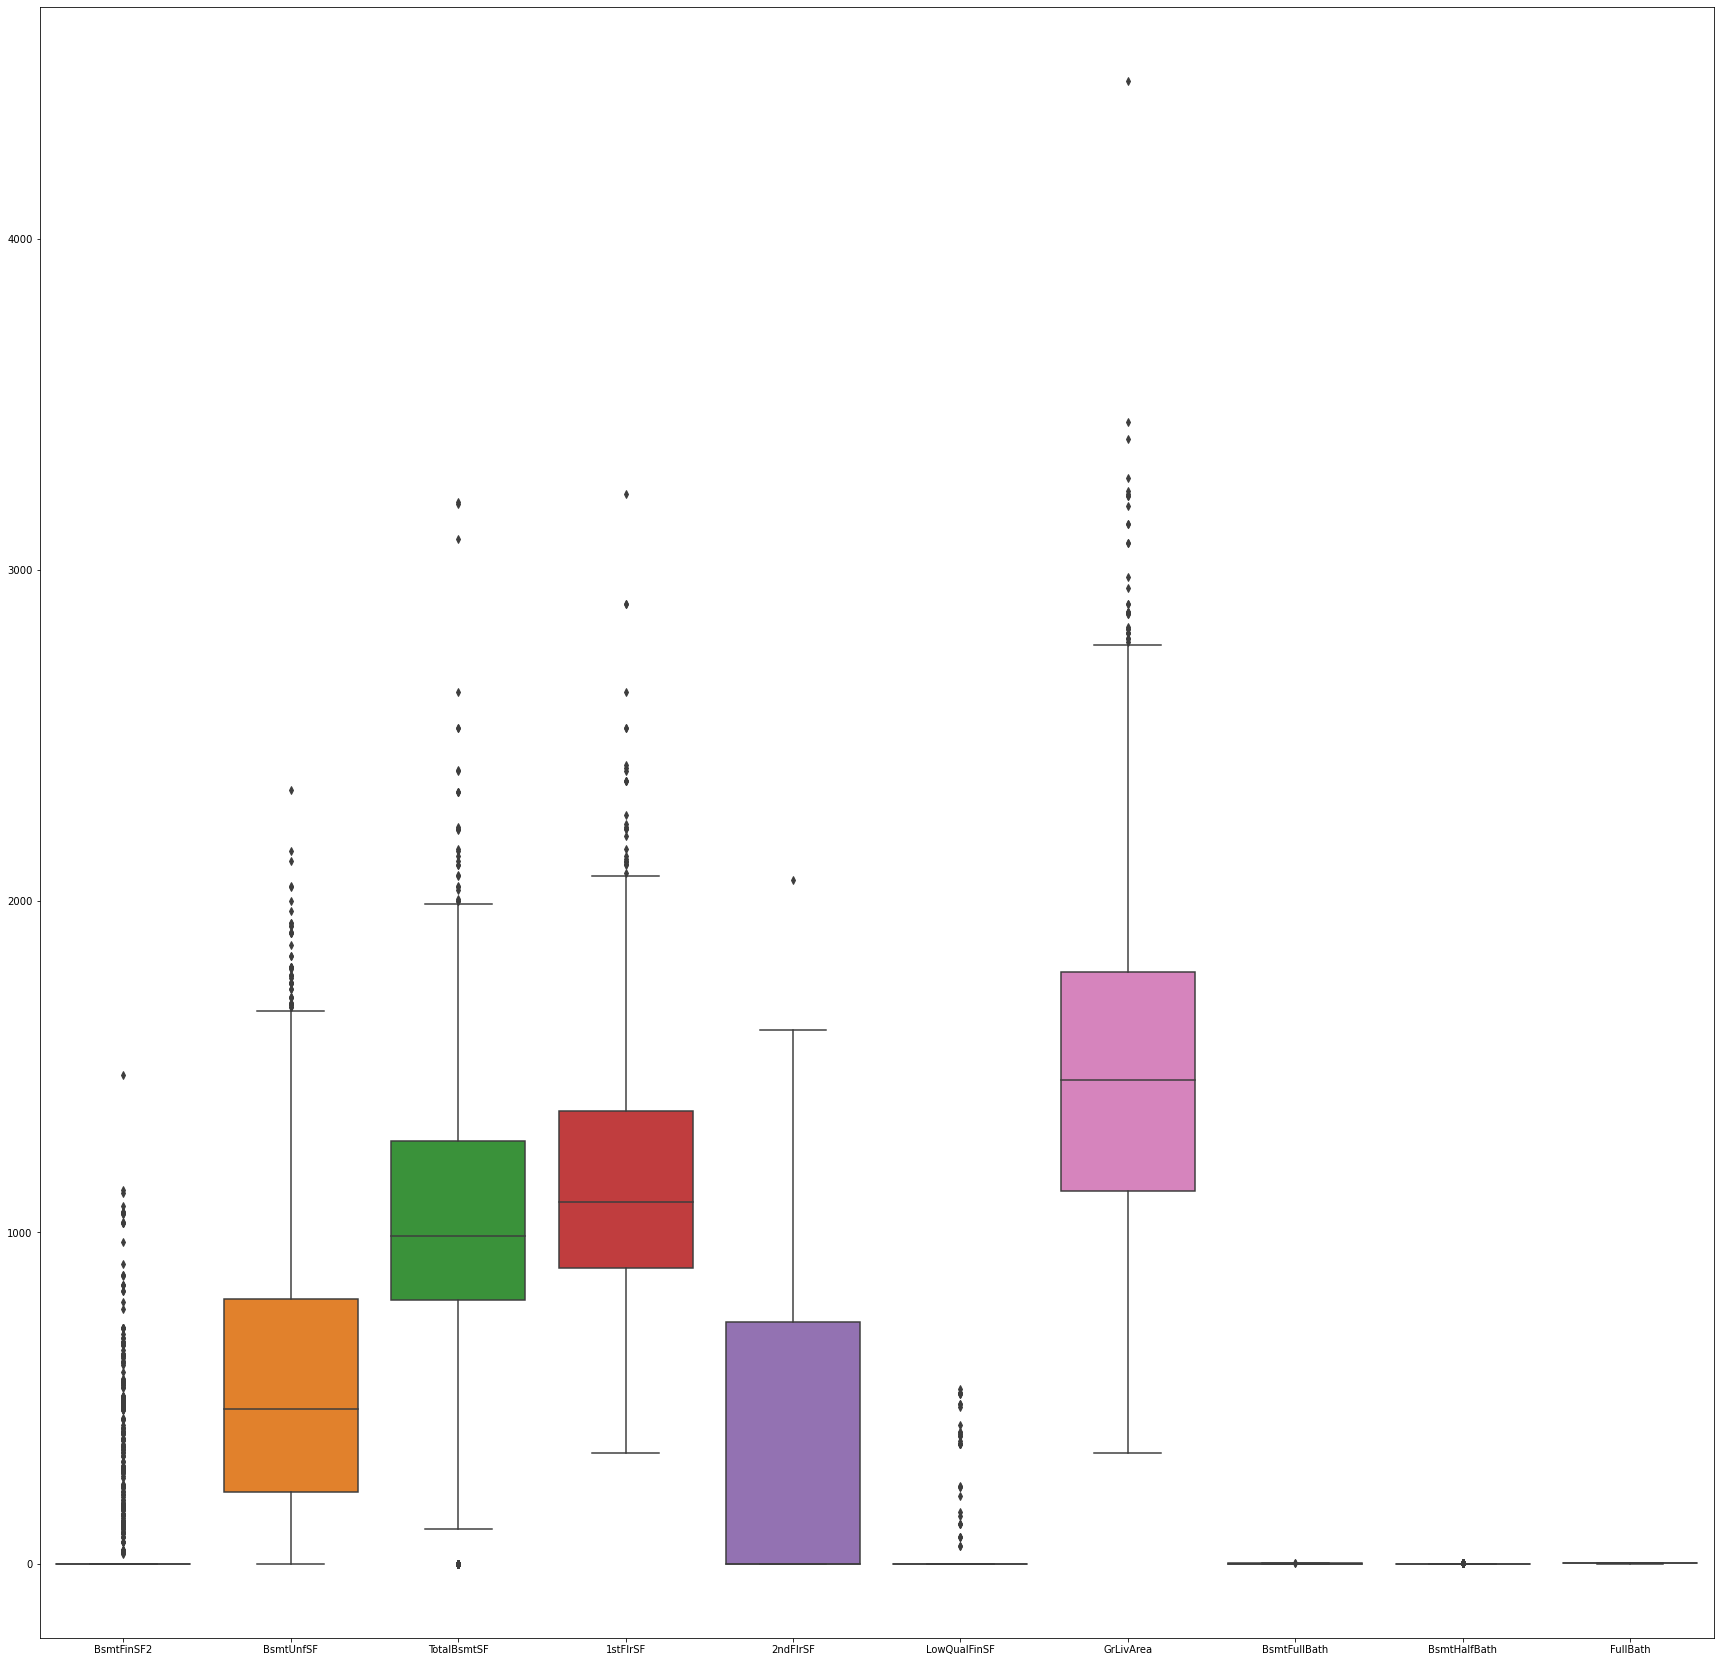

In [99]:
fig=plt.figure(figsize=(30,30))
sns.boxplot(data=df[['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath']])

# outliers removing

In [100]:
import sklearn
import pandas as pd
  
''' Detection '''
# IQR
Q1 = np.percentile(df[['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea']], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df[['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea']], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df[['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea']] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df[['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea']] <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (1937, 81)
New Shape:  (1910, 81)


# dataframe reset

In [101]:
df.reset_index(drop=True,inplace=True)

# boxplot to see outliers

<AxesSubplot:>

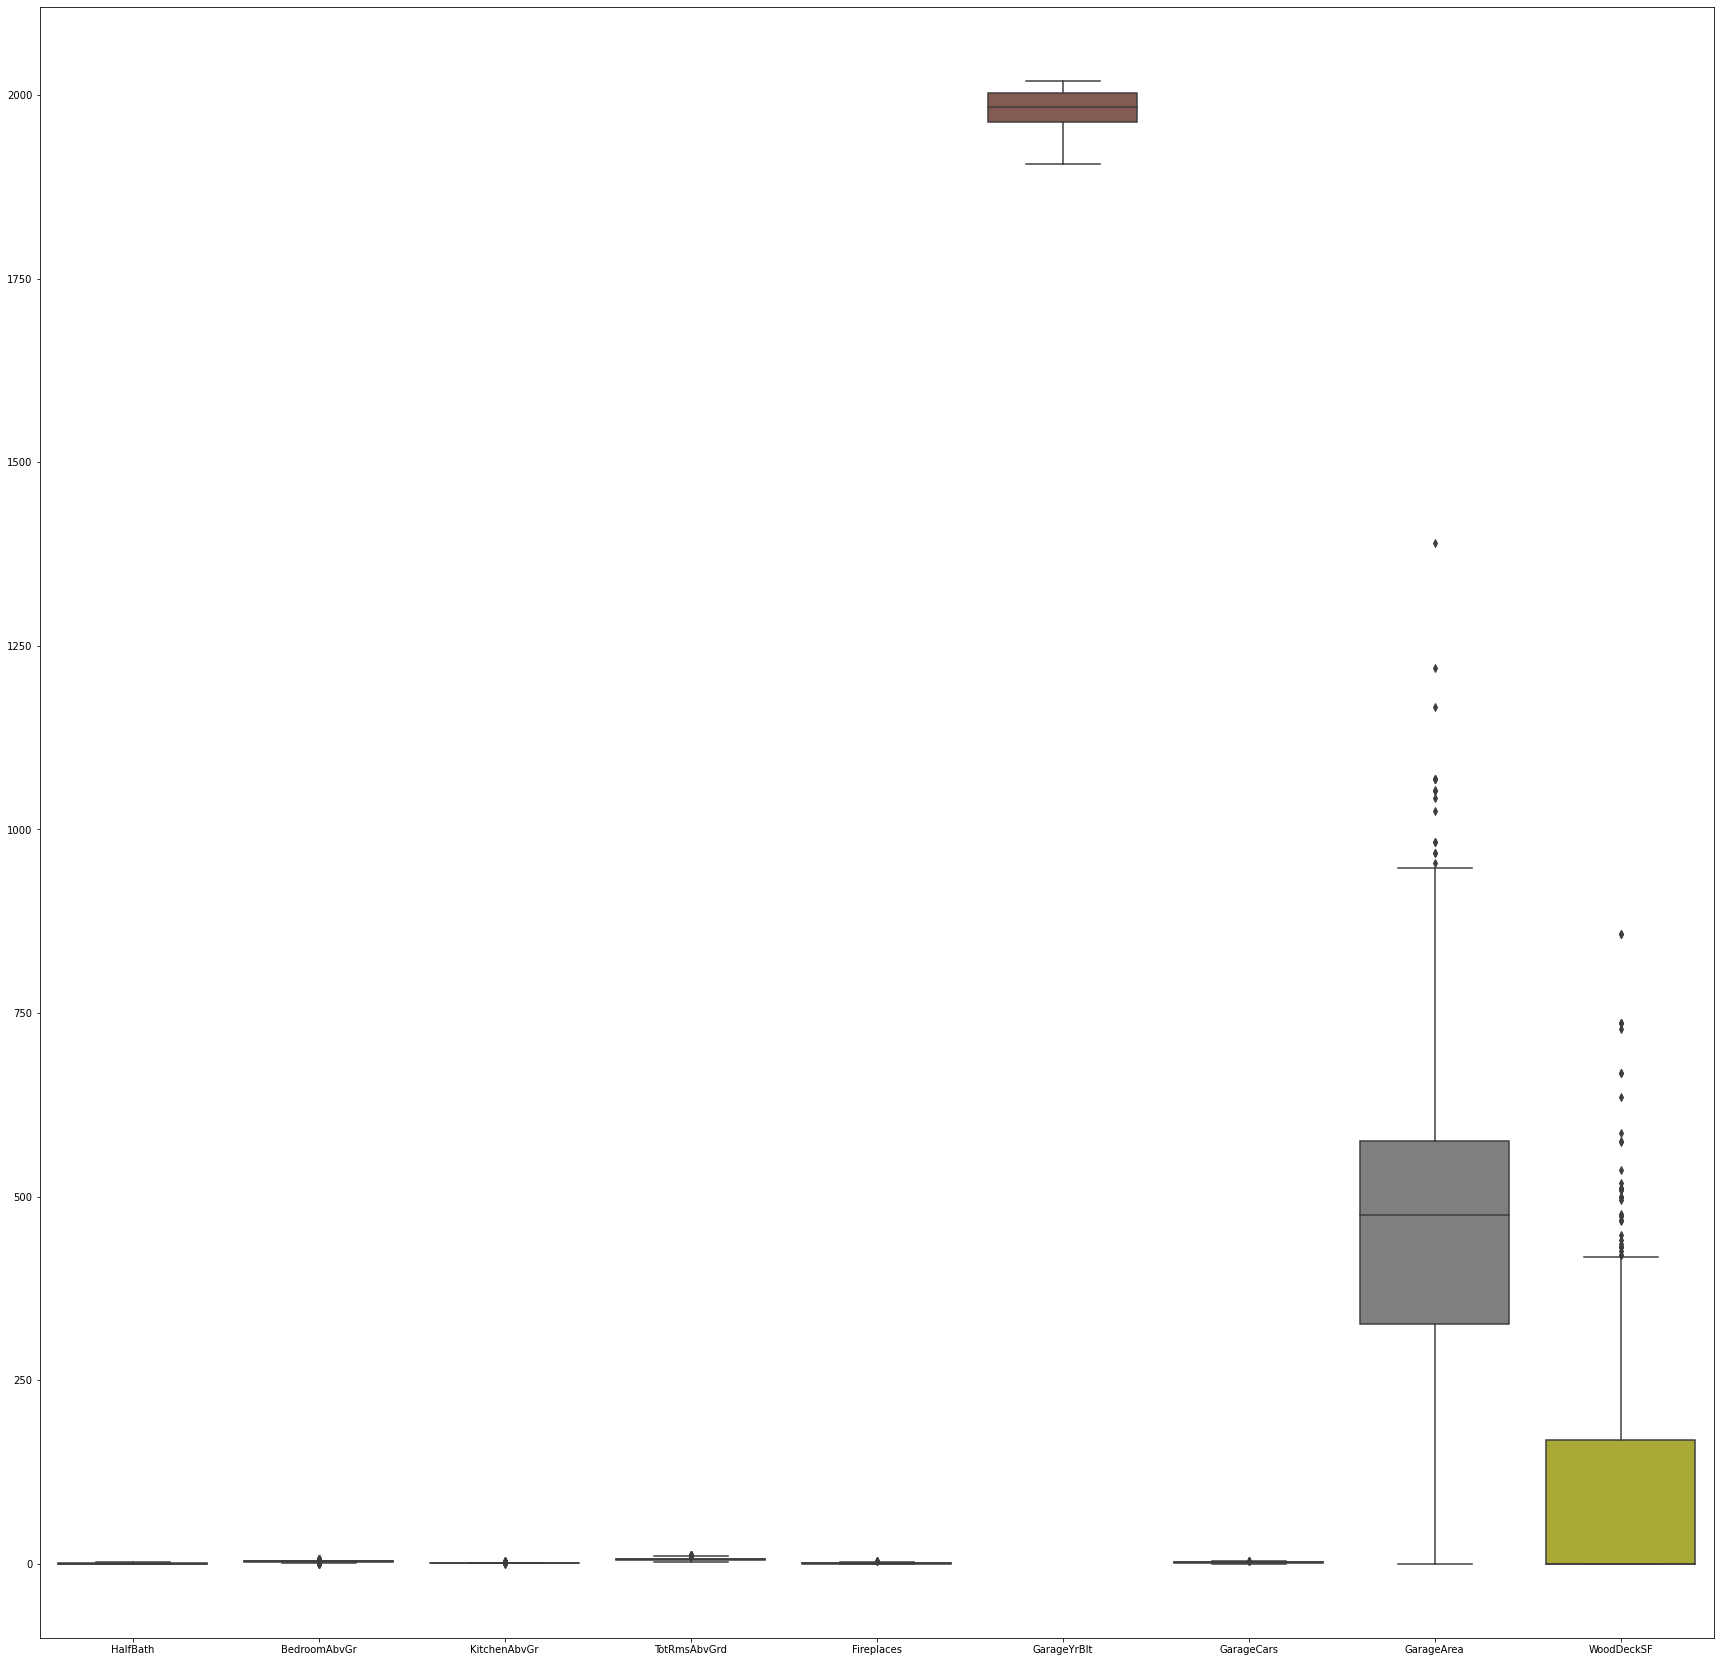

In [102]:
fig=plt.figure(figsize=(30,30))
sns.boxplot(data=df[['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF']])

# outliers removing

In [103]:
import sklearn
import pandas as pd
  
''' Detection '''
# IQR
Q1 = np.percentile(df[['GarageArea', 'WoodDeckSF']], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df[['GarageArea', 'WoodDeckSF']], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df[['GarageArea', 'WoodDeckSF']] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df[['GarageArea', 'WoodDeckSF']] <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (1910, 81)
New Shape:  (1908, 81)


# dataframe reset

In [104]:
df.reset_index(drop=True,inplace=True)

# boxplot to see outliers

<AxesSubplot:>

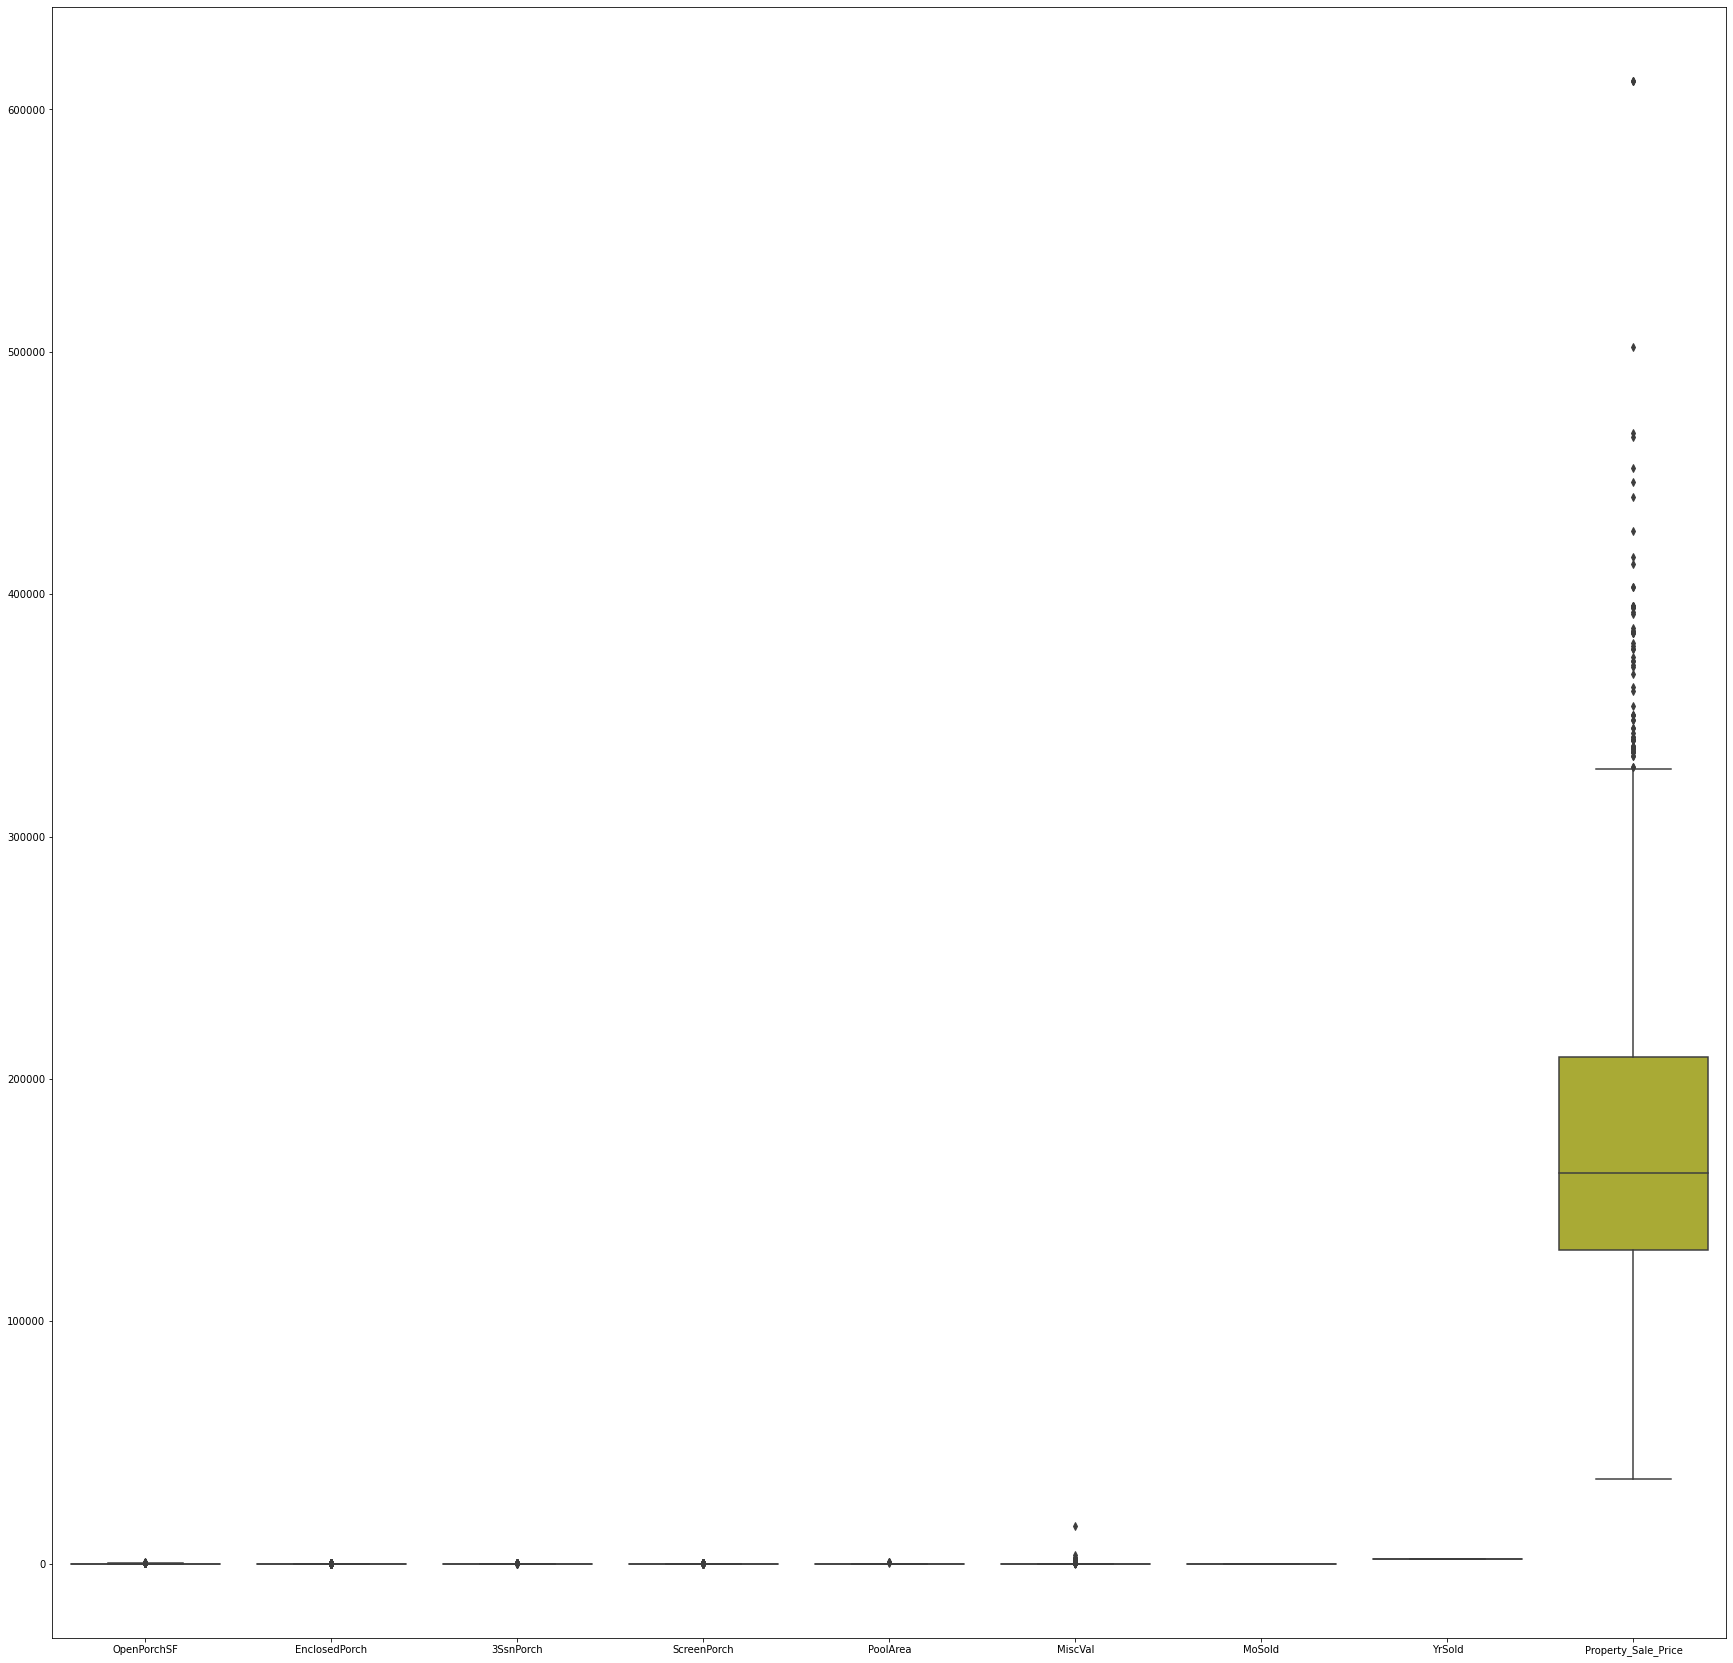

In [105]:
fig=plt.figure(figsize=(30,30))
sns.boxplot(data=df[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price']])

# outliers removing

In [106]:
import sklearn
import pandas as pd
  
''' Detection '''
# IQR
Q1 = np.percentile(df[[ 'MiscVal','Property_Sale_Price']], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(df[[ 'MiscVal','Property_Sale_Price']], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
  
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df[[ 'MiscVal','Property_Sale_Price']] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df[[ 'MiscVal','Property_Sale_Price']] <= (Q1-1.5*IQR))
  
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (1908, 81)
New Shape:  (1896, 81)


In [107]:
df.shape

(1896, 81)

# numerical features

In [108]:
num=df.select_dtypes(exclude='object')

In [109]:
num.shape

(1896, 38)

# categorical features

In [110]:
cat=df.select_dtypes(include='object')

In [111]:
cat.shape

(1896, 43)

# converted categorical features to dummy variable

In [112]:
cat_dummy=pd.get_dummies(cat)

In [113]:
cat_dummy.shape

(1896, 260)

# concatenate numerical and dummy variables

In [114]:
df_concat=pd.concat([num,cat_dummy],axis=1)

In [115]:
df_concat.shape

(1896, 298)

# defining x and y

In [116]:
x=df_concat.drop(['Property_Sale_Price'],axis=1)

In [117]:
y=df.Property_Sale_Price

# train test split

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1327, 297), (569, 297), (1327,), (569,))

In [120]:
print('number of test sample:',x_test.shape[0])
print('number of training sample:',x_train.shape[0])

number of test sample: 569
number of training sample: 1327


# feature selection using correlation coefficient

In [121]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [122]:
corr_features = correlation(x_train,0.85)
len(set(corr_features))

31

# independent variable with high correlation between them

In [123]:
corr_features

{'BsmtCond_none',
 'BsmtExposure_none',
 'BsmtFinType1_none',
 'BsmtFinType2_none',
 'CentralAir_Y',
 'Electrical_Mix',
 'ExterCond_TA',
 'ExterQual_TA',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'FireplaceQu_none',
 'GarageArea',
 'GarageCond_Ex',
 'GarageCond_none',
 'GarageFinish_none',
 'GarageQual_none',
 'LandSlope_Mod',
 'MiscFeature_Gar2',
 'MiscFeature_TenC',
 'MiscFeature_none',
 'PoolQC_none',
 'Property_Shape_Reg',
 'Road_Type_Pave',
 'RoofMatl_Tar&Grv',
 'RoofStyle_Hip',
 'SaleCondition_Partial',
 'Utilities_NoSeWa'}

# making copy

In [124]:
import copy

In [125]:
x1_train=copy.copy(x_train)
y1_train=copy.copy(y_train)
x1_test=copy.copy(x_test)
y1_test=copy.copy(y_test)

# droping the independent variable with high correlation between them

In [126]:
x_train.drop(corr_features,axis=1)
x_test.drop(corr_features,axis=1)

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
567,606,60,85.0,13600,7,6,1965,1990,176.0,454,...,0,0,0,0,1,0,0,0,0,1
1756,953,85,60.0,7200,4,6,1983,2003,0.0,660,...,0,0,0,0,1,0,0,0,0,1
1097,1175,70,80.0,16560,6,8,1932,1950,0.0,503,...,0,0,0,0,1,0,0,0,0,1
649,696,20,54.0,13811,6,6,1987,1987,32.0,980,...,0,0,0,0,1,0,0,0,0,1
324,345,160,36.0,2592,5,3,1976,1976,0.0,129,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,216,20,72.0,10011,5,6,1957,1996,26.0,360,...,0,0,0,0,1,0,0,0,0,1
485,518,60,79.0,10208,7,5,1996,1997,921.0,0,...,0,0,0,0,1,0,0,0,0,1
1785,983,20,43.0,3182,7,4,2007,2007,78.0,0,...,0,0,0,0,1,0,0,0,0,1
731,781,20,63.0,7875,7,5,1995,1996,41.0,0,...,0,0,0,0,1,0,0,0,0,1


# linear regression with ordinary least square method

In [127]:
import statsmodels.api as sm
import numpy as np

In [128]:
x1=sm.add_constant(x_train)

In [129]:
model=sm.OLS(y_train,x1)

In [130]:
model

In [131]:
results=model.fit()

In [132]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.943
Model:                             OLS   Adj. R-squared:                  0.930
Method:                  Least Squares   F-statistic:                     74.96
Date:                 Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                         15:41:19   Log-Likelihood:                -14722.
No. Observations:                 1327   AIC:                         2.993e+04
Df Residuals:                     1086   BIC:                         3.118e+04
Df Model:                          240                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.582e+04   8.29e+04     -1.035      0.301   -2.48e+05    7.68e+04
Id                       -1.5580      1.129     -1.380      0.168      -3.773       0.657
Dwell_Type               -0.6903      2.592     -0.266      0.790      -5.777       4.396
LotFrontage              39.6131     29.755      1.331      0.183     -18.772      97.998
LotArea                   0.8330      0.246      3.391      0.001       0.351       1.315
OverallQual             591.8105    445.475      1.328      0.184    -282.279    1465.900
OverallCond            1763.0009    454.067      3.883      0.000     872.053    2653.949
YearBuilt                37.0194     32.913      1.125      0.261     -27.560     101.599
YearRemodAdd            145.6166     45.244      3.218      0.001      56.841     234.392
MasVnrArea                9.5551      4.988      1.915      0.056      -0.233      19.343
BsmtFinSF1               17.1990      2.530      6.799      0.000      12.235      22.163
BsmtFinSF2                2.8862      4.982      0.579      0.563      -6.890      12.662
BsmtUnfSF                 1.1938      2.337      0.511      0.609      -3.391       5.778
TotalBsmtSF              21.2790      3.757      5.664      0.000      13.907      28.651
1stFlrSF                 17.9562      5.392      3.330      0.001       7.375      28.537
2ndFlrSF                 23.5996      4.381      5.387      0.000      15.003      32.196
LowQualFinSF            -10.7894     11.567     -0.933      0.351     -33.486      11.907
GrLivArea                30.7664      4.728      6.507      0.000      21.490      40.043
BsmtFullBath           1319.9137   1628.416      0.811      0.418   -1875.284    4515.111
BsmtHalfBath           1332.2226   2510.254      0.531      0.596   -3593.275    6257.720
FullBath               3262.2050   1951.167      1.672      0.095    -566.279    7090.689
HalfBath               3972.4826   1791.829      2.217      0.027     456.645    7488.320
BedroomAbvGr          -1736.6077   1203.911     -1.442      0.149   -4098.863     625.647
KitchenAbvGr          -1.321e+04   4954.128     -2.667      0.008   -2.29e+04   -3492.963
TotRmsAbvGrd           -823.6489    812.879     -1.013      0.311   -2418.639     771.341
Fireplaces             2965.8889   2533.810      1.171      0.242   -2005.828    7937.606
GarageYrBlt             -99.5342     48.842     -2.038      0.042    -195.370      -3.699
GarageCars             3892.1763   1913.272      2.034      0.042     138.048    7646.305
GarageArea               28.3553      6.710      4.226      0.000      15.190      41.521
WoodDeckSF               19.5584      5.186      3.771      0.000       9.383      29.734
OpenPorchSF              21.5788     10.040      2.149      0.032       1.879      41.278
EnclosedPorc

# multiple linear regression

In [133]:
 from sklearn.linear_model import LinearRegression

In [134]:
lm=LinearRegression() # create a linear regression object

In [135]:
lm.fit(x_train,y_train) #fit the model

LinearRegression()

In [136]:
yhat=lm.predict(x_test)

In [137]:
from sklearn.metrics import mean_squared_error,r2_score

In [138]:
print('rsquared values for regression is:', r2_score(y_test,yhat))

rsquared values for regression is: 0.9108612897862534


In [139]:
from sklearn.metrics import mean_squared_error

In [140]:
print('mean squared error for regression 1 is :',mean_squared_error(y_test,yhat))
print('root mean squared error for regression 1 is :',np.sqrt(mean_squared_error( ,yhat)))

mean squared error for regression 1 is : 352987959.27020293
root mean squared error for regression 1 is : 18787.973793632


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Property_Sale_Price', ylabel='Density'>

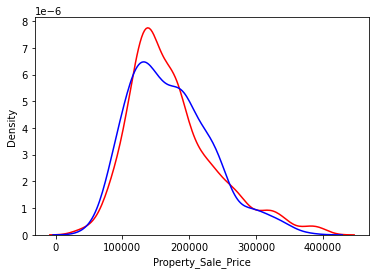

In [141]:
ax1=sns.distplot(y,hist=False,color='r',label='actual values')
sns.distplot(yhat,hist=False,color='b',label='fitted values',ax=ax1)

# cross validation...techniques to check accuracy

# 1. hold out validation approach..test train split

In [142]:
import copy

x1=copy.copy(x)
y1=copy.copy(y)


### cross validation by decision tree....changing iteration and seeing

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x5_train,x5_test,y5_train,y5_test=train_test_split(x1,y1,test_size=30,random_state=0)
lm= DecisionTreeClassifier() # create a linear regression object
lm.fit(x5_train,y5_train) #fit the model
result=lm.score(x5_test,y5_test)
print(result)

0.36666666666666664


In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x5_train,x5_test,y5_train,y5_test=train_test_split(x1,y1,test_size=30,random_state=5)
lm= DecisionTreeClassifier() # create a linear regression object
lm.fit(x5_train,y5_train) #fit the model
result=lm.score(x5_test,y5_test)
print(result)

0.5


### cross validation by linear regression....changing iteration and seeing

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x5_train,x5_test,y5_train,y5_test=train_test_split(x1,y1,test_size=30,random_state=0)
lr= LinearRegression() # create a linear regression object
lr.fit(x5_train,y5_train) #fit the model
result=lr.score(x5_test,y5_test)
print(result)

0.871721009741711


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x5_train,x5_test,y5_train,y5_test=train_test_split(x1,y1,test_size=30,random_state=25)
lr= LinearRegression() # create a linear regression object
lr.fit(x5_train,y5_train) #fit the model
result=lr.score(x5_test,y5_test)
print(result)

0.9434183886819357


# 2. kfold cross validation

### by linear regression

In [147]:
from sklearn.model_selection import KFold
lr= LinearRegression() # create a linear regression object
kfold_validation=KFold(10)# it will do 10 different split
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(lr,x1,y1,cv=kfold_validation)
print(results)
print(np.mean(results))

[ 9.02662585e-01  9.07523030e-01  9.09538990e-01  8.72569775e-01
  9.40966833e-01 -1.61431693e+07  9.10990827e-01 -2.25554435e+06
  9.21034560e-01  9.32637187e-01]
-1839870.6306905348


In [148]:
from sklearn.model_selection import KFold
lb= LinearRegression() # create a linear regression object
kfold_validation=KFold(5)# it will do 10 different split
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(lb,x1,y1,cv=kfold_validation)
print(results)
print(np.mean(results))

[ 8.98793251e-01  8.90464062e-01 -1.00227949e+08  9.15627165e-01
  9.05278105e-01]
-20045589.026855864


### by decision tree

In [149]:
from sklearn.model_selection import KFold
lt= DecisionTreeClassifier() # create a linear regression object
kfold_validation=KFold(10)# it will do 10 different split
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(lt,x1,y1,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.18421053 0.00526316 0.         0.3        0.69473684 0.17894737
 0.18518519 0.5978836  0.5978836  0.8994709 ]
0.3643581175160123


In [150]:
from sklearn.model_selection import KFold
ld= DecisionTreeClassifier() # create a linear regression object
kfold_validation=KFold(5)# it will do 10 different split
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(ld,x1,y1,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.11315789 0.13720317 0.42480211 0.33509235 0.77044855]
0.3561408137758645


# 3. stratified kfold cross validation....used for inbalanced data

### by decission tree

In [151]:
from sklearn.model_selection import StratifiedKFold
skfold= StratifiedKFold(n_splits=5)
lz= DecisionTreeClassifier() # create a linear regression object
results=cross_val_score(lz,x1,y1,cv=skfold)
print(results)
print(np.mean(results))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.25       0.32717678 0.32189974 0.42744063 0.55936675]
0.3771767810026385


### by linear regression

In [152]:
from sklearn.model_selection import StratifiedKFold
skfold= StratifiedKFold(n_splits=5)
lU= LinearRegression() # create a linear regression object
results=cross_val_score(lU,x1,y1,cv=skfold)
print(results)
print(np.mean(results))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.88212358 0.9282195  0.9221781  0.9019831  0.91669179]
0.9102392162420821


# 4. reapeated random test train split

### by linear regression

In [153]:
from sklearn.model_selection import ShuffleSplit
lj= LinearRegression() # create a linear regression object
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results=cross_val_score(lj,x1,y1,cv=ssplit)
print(results)
print(np.mean(results))

[ 9.00455763e-01 -5.52352666e+08 -1.36744722e+09  9.10185853e-01
 -8.97570536e+09 -2.93424556e+09  9.17951367e-01  8.98866134e-01
 -2.51402944e+08  9.04816045e-01]
-1408115374.9276478


### by decission tree

In [154]:
from sklearn.model_selection import ShuffleSplit
ld=DecisionTreeClassifier() # create a linear regression object
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results=cross_val_score(ld,x1,y1,cv=ssplit)
print(results)
print(np.mean(results))

[0.29876977 0.29173989 0.33216169 0.30052724 0.2741652  0.28119508
 0.25307557 0.3198594  0.28646749 0.31107206]
0.2949033391915642


# observation

### By doing cross validation with differnt models we get to a conculsion that with OLS model we get good accuracy as comparing with other models